In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('anomaly_removed_column_organised.csv')

# Select only the numerical columns to calculate correlations
numerical_columns =    ['score', 'user score', 'critics', 'users',
                       'price', 'dlc_count', 'achievements',
                       'average_playtime_forever', 'average_playtime_2weeks',
                       'median_playtime_forever', 'median_playtime_2weeks',
                       'total_steam_reviews', 'percent_positive_steam', 'Estimated_Owners_Numeric']

print(df[numerical_columns].dtypes)
print(df.shape[0])

score                         int64
user score                   object
critics                       int64
users                         int64
price                       float64
dlc_count                     int64
achievements                  int64
average_playtime_forever      int64
average_playtime_2weeks       int64
median_playtime_forever       int64
median_playtime_2weeks        int64
total_steam_reviews           int64
percent_positive_steam      float64
Estimated_Owners_Numeric    float64
dtype: object
1812


In [215]:
df['user score'] = pd.to_numeric(df['user score'], errors='coerce')
df.replace('tbd', np.nan, inplace=True)
print(df.shape[0])
df = df.dropna()
print(df.shape[0])
print(df[numerical_columns].dtypes)

1812
1779
score                         int64
user score                  float64
critics                       int64
users                         int64
price                       float64
dlc_count                     int64
achievements                  int64
average_playtime_forever      int64
average_playtime_2weeks       int64
median_playtime_forever       int64
median_playtime_2weeks        int64
total_steam_reviews           int64
percent_positive_steam      float64
Estimated_Owners_Numeric    float64
dtype: object


In [182]:
# !pip install matplotlib==3.7.3
# !pip install seaborn --upgrade
import seaborn
import matplotlib
print(matplotlib.__version__)
print(seaborn.__version__)

3.10.0
0.13.2


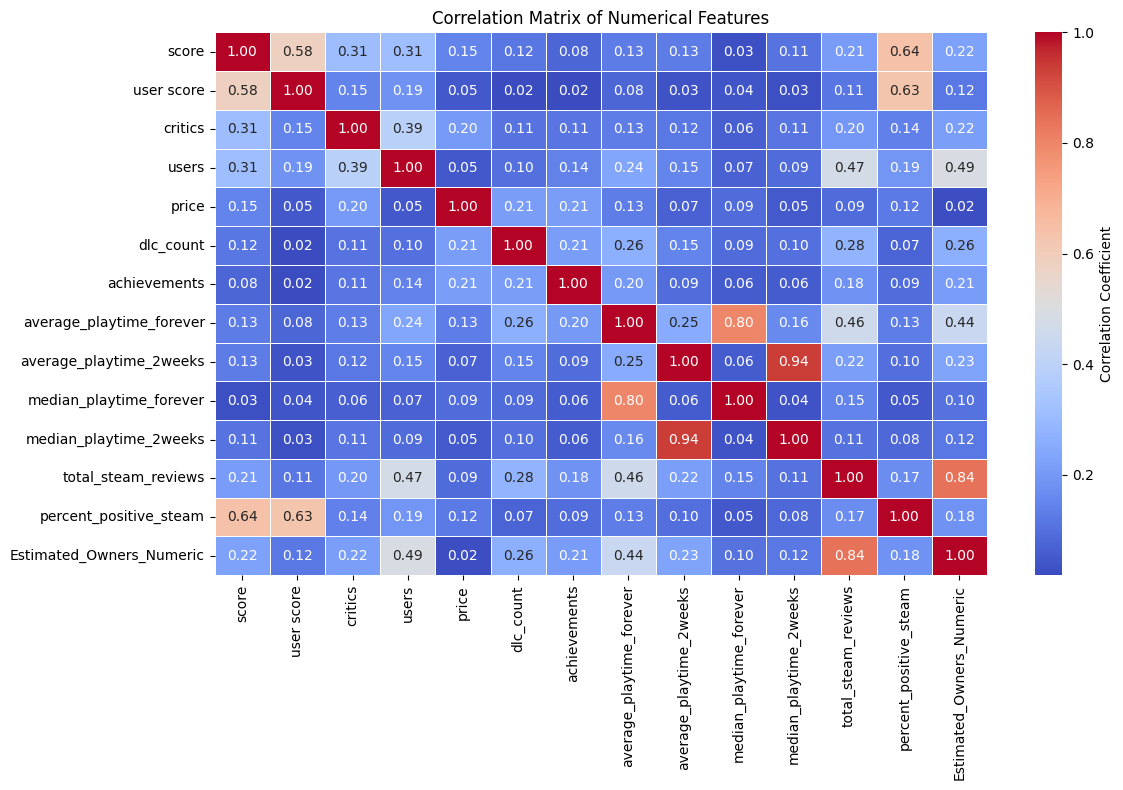

In [183]:
corr_matrix = df[numerical_columns].corr()

# num_columns_small = ['score', 'user score', 'critics', 'users']
corr_matrix_small = df[num_columns_small].corr()
#print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 10}, cbar_kws={'label': 'Correlation Coefficient'}, annot = True)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('Graphs/Correlation Matrix.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [184]:
# Set a threshold for high correlation, e.g., 0.9
threshold = 0.75
# Create a mask for the upper triangle of the correlation matrix
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation above the threshold
high_corr = [column for column in corr_matrix_upper.columns if any(corr_matrix_upper[column] >= threshold)]

# Drop these highly correlated columns
df2 = df.drop(columns=high_corr)

print(f"Columns dropped due to high correlation: {high_corr}")

Columns dropped due to high correlation: ['median_playtime_forever', 'median_playtime_2weeks', 'Estimated_Owners_Numeric']


Number of components to keep 95% variance: 10


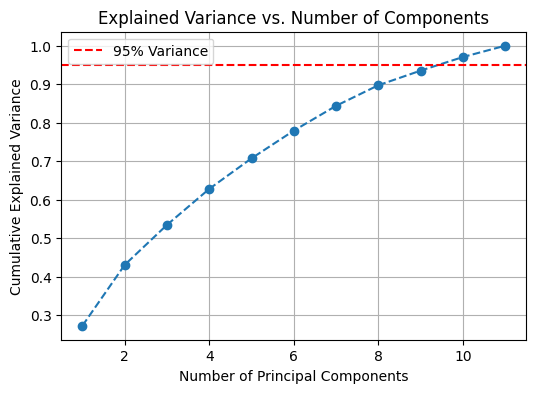

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_columns_drop =    ['score', 'user score', 'critics', 'users',
                       'price', 'dlc_count', 'achievements',
                       'average_playtime_forever', 'average_playtime_2weeks',
                       'total_steam_reviews', 'percent_positive_steam']

X =  df2[numerical_columns_drop]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to keep 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to keep 95% variance: {n_components}")

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.savefig('Graphs/PCA Analysis.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

In [186]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(X.columns))],
                        index=X.columns)

print("PCA Component Loadings:")
#print(loadings)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
importance_scores = loadings.abs().sum(axis=1)

# Sort in ascending order (least important features first)
least_important_features = importance_scores.sort_values()
print("Least Important Features:")
print(least_important_features)

PCA Component Loadings:
[0.27309625 0.15789469 0.10383874 0.09343864 0.0793263  0.07191207
 0.06443638 0.05343347 0.03796037 0.03528937 0.02937372]
[0.27309625 0.43099093 0.53482967 0.62826831 0.70759461 0.77950668
 0.84394306 0.89737653 0.9353369  0.97062628 1.        ]
Least Important Features:
score                       2.210499
user score                  2.229517
achievements                2.362351
average_playtime_2weeks     2.362411
percent_positive_steam      2.380823
dlc_count                   2.557856
critics                     2.595206
users                       2.647603
price                       2.663629
average_playtime_forever    2.714846
total_steam_reviews         2.790131
dtype: float64


In [187]:
df2.to_csv('more_dropped_columns.csv', index=False)

In [188]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Set bin edges with 0.1 intervals
# bins = np.arange(min(df2['user score']), max(df2['user score']) + 0.1, 0.1)

# # Plot histogram with specified bins
# plt.hist(df2['user score'], bins=bins, alpha=0.7, color='blue', edgecolor='black')

# # Labels and title
# plt.xlabel("User Score")
# plt.ylabel("Frequency")
# plt.title("Histogram of User Scores with 0.1 Interval Bins")

# # Show the plot
# plt.show()

In [189]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
data = df2['user score']
skew_value = skew(data)
kurt_value = kurtosis(data)

print(f"Skewness: {skew_value:.2f}")
print(f"Kurtosis: {kurt_value:.2f}")

Skewness: -1.24
Kurtosis: 2.28


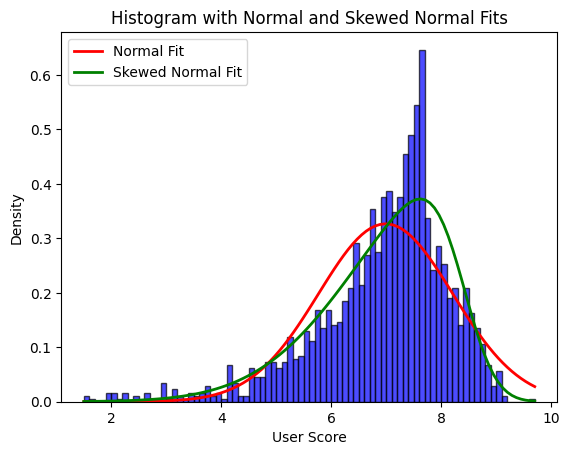

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm

# Get the data
data = df2['user score']

# Fit the distributions
params_normal = norm.fit(data)
params_skewed = skewnorm.fit(data)

# Generate x-values for plotting
x_vals = np.linspace(min(data), max(data), 100)

# Calculate the PDF for the distributions
y_vals_normal = norm.pdf(x_vals, *params_normal)
y_vals_skewed = skewnorm.pdf(x_vals, *params_skewed)

# Plot the histogram
bins = np.arange(min(data), max(data) + 0.1, 0.1)  # Adjust bin width to 0.1
plt.hist(data, bins=bins, alpha=0.7, color='blue', edgecolor='black', density=True)

# Plot the normal and skewed normal fits
plt.plot(x_vals, y_vals_normal, color='red', label="Normal Fit", linewidth=2)
plt.plot(x_vals, y_vals_skewed, color='green', label="Skewed Normal Fit", linewidth=2)

plt.savefig('Graphs/histogram_with_skewed_normal_fit.png', dpi=300, bbox_inches='tight')
plt.xlabel("User Score")
plt.ylabel("Density")
plt.title("Histogram with Normal and Skewed Normal Fits")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [191]:
# Calculate the log-likelihood for normal distribution
log_likelihood_normal = np.sum(np.log(norm.pdf(data, *params_normal)))
# Calculate the log-likelihood for skewed normal distribution
log_likelihood_skewed = np.sum(np.log(skewnorm.pdf(data, *params_skewed)))

# Number of parameters for each distribution
k_normal = 2  # Normal distribution has 2 parameters (mean, std)
k_skewed = 3  # Skewed normal distribution has 3 parameters (mean, std, skew)

# Calculate AIC for both models
AIC_normal = 2 * k_normal - 2 * log_likelihood_normal
AIC_skewed = 2 * k_skewed - 2 * log_likelihood_skewed

# Print log-likelihood and AIC for comparison
print(f"Normal Log-Likelihood: {log_likelihood_normal:.2f}")
print(f"Skewed Normal Log-Likelihood: {log_likelihood_skewed:.2f}")
print(f"Normal AIC: {AIC_normal:.2f}")
print(f"Skewed Normal AIC: {AIC_skewed:.2f}")

# The model with the lower AIC is the better fit
if AIC_normal < AIC_skewed:
    print("Normal distribution fits the data better (lower AIC).")
else:
    print("Skewed normal distribution fits the data better (lower AIC).")

Normal Log-Likelihood: -2879.95
Skewed Normal Log-Likelihood: -2709.00
Normal AIC: 5763.90
Skewed Normal AIC: 5423.99
Skewed normal distribution fits the data better (lower AIC).


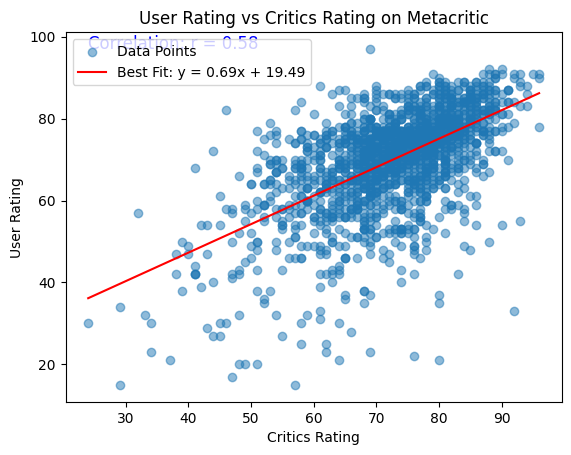

Equation of best fit: y = 0.69x + 19.49
Correlation coefficient (r): 0.58


In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extract X and Y values
x = df2['score']
y = df2['user score']*10

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Generate fitted line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept

# Scatter plot
plt.scatter(x, y, alpha=0.5, label="Data Points")

# Line of best fit
plt.plot(x_fit, y_fit, color="red", label=f"Best Fit: y = {slope:.2f}x + {intercept:.2f}")

# Correlation coefficient
plt.text(min(x), max(y), f"Correlation: r = {r_value:.2f}", fontsize=12, color="blue")

# Labels and title
plt.xlabel("Critics Rating")
plt.ylabel("User Rating")
plt.title("User Rating vs Critics Rating on Metacritic")


plt.legend()
plt.show()

# Print regression equation
print(f"Equation of best fit: y = {slope:.2f}x + {intercept:.2f}")
print(f"Correlation coefficient (r): {r_value:.2f}")

In [193]:
# x = df2['user score']*10
# y = df2['user score']*10 - df['score']

# # Calculate linear regression
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# # Generate fitted line
# x_fit = np.linspace(min(x), max(x), 100)
# y_fit = slope * x_fit + intercept
# y_mean = np.mean(y)

# # Scatter plot
# plt.scatter(x, y, alpha=0.2, label="Data Points")


# # Line of best fit
# plt.plot(x_fit, y_fit, color="red", label=f"Best Fit: y = {slope:.2f}x + {intercept:.2f}")
# # Correlation coefficient
# plt.text(min(x), max(y), f"Correlation: r = {r_value:.2f}", fontsize=12, color="blue")
# plt.axhline(y_mean, color="green", linestyle="dashed", linewidth=2, label=f"Mean Rating Difference = {y_mean:.2f}")

# # Labels and title
# plt.xlabel("User Rating")
# plt.ylabel("Rating Difference")
# plt.title("Difference between User & Critics Rating vs User Rating")
# plt.savefig("user_vs_critics.png", dpi=300, bbox_inches="tight")
# plt.legend()
# plt.show()

# # Print regression equation
# print(f"Equation of best fit: y = {slope:.2f}x + {intercept:.2f}")
# print(f"Correlation coefficient (r): {r_value:.2f}")

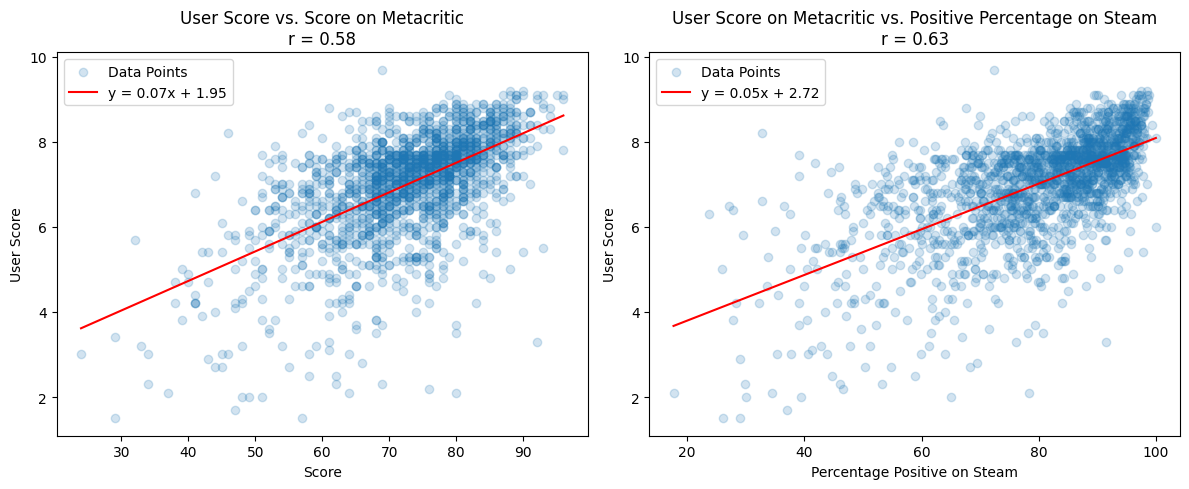

Equation 1: y = 0.07x + 1.95, r = 0.58
Equation 2: y = 0.05x + 2.72, r = 0.63


In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter Plot 1: user_score vs. score
x1 = df2['score']
y1 = df2['user score']
slope1, intercept1, r_value1, _, _ = linregress(x1, y1)
x_fit1 = np.linspace(min(x1), max(x1), 100)
y_fit1 = slope1 * x_fit1 + intercept1

axes[0].scatter(x1, y1, alpha=0.2, label="Data Points")
axes[0].plot(x_fit1, y_fit1, color="red", label=f"y = {slope1:.2f}x + {intercept1:.2f}")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("User Score")
axes[0].set_title(f"User Score vs. Score on Metacritic\nr = {r_value1:.2f}")
axes[0].legend()

# Scatter Plot 2: user_score vs. percentage_positive
x2 = df2['percent_positive_steam']*100
y2 = df2['user score']
slope2, intercept2, r_value2, _, _ = linregress(x2, y2)
x_fit2 = np.linspace(min(x2), max(x2), 100)
y_fit2 = slope2 * x_fit2 + intercept2

axes[1].scatter(x2, y2, alpha=0.2, label="Data Points")
axes[1].plot(x_fit2, y_fit2, color="red", label=f"y = {slope2:.2f}x + {intercept2:.2f}")
axes[1].set_xlabel("Percentage Positive on Steam")
axes[1].set_ylabel("User Score")
axes[1].set_title(f"User Score on Metacritic vs. Positive Percentage on Steam\nr = {r_value2:.2f}")
axes[1].legend()
plt.savefig("Graphs/user_score_scatters.png", dpi=300, bbox_inches="tight")
# Adjust layout
plt.tight_layout()
plt.show()

# Print equations and correlation values
print(f"Equation 1: y = {slope1:.2f}x + {intercept1:.2f}, r = {r_value1:.2f}")
print(f"Equation 2: y = {slope2:.2f}x + {intercept2:.2f}, r = {r_value2:.2f}")
